# Applying Data-Driven Analytics and Intelligent Automation to Optimise Customer Acquisition and Retention Decisions

## Project Context
Digital businesses increasingly rely on customer data to drive acquisition, retention, and performance optimisation. However, many organisations struggle to translate raw transactional and behavioural data into actionable insights that can inform automation and decision-making.

This project demonstrates how Python-based data analytics can be applied to recent e-commerce transaction data (2023–2024) to identify customer behaviour patterns, support segmentation, and highlight opportunities where intelligent automation can enhance growth and retention strategies.

The analysis is framed to reflect challenges and decision-making processes relevant to modern UK e-commerce and digital businesses.


In [2]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check date range
print("Date range:")
print(df['Date'].min(), "to", df['Date'].max())

# Create Revenue field if not already present
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Unit_Price'] * df['Quantity']

# Basic sanity checks
print("\nMissing values per column:")
display(df.isna().sum())

print("\nRevenue summary:")
display(df['Revenue'].describe())


NameError: name 'pd' is not defined

## Dataset & Objectives
**Dataset:** Public e-commerce customer behavior & sales data (2023–2024)

**Repository path:** `data/ecommerce_2023_2024.csv`

### Objectives
1. Validate dataset structure and data types.
2. Understand customer behaviour patterns and transaction dynamics.
3. Generate insights relevant to acquisition, retention, and automation.
4. Identify analytics-driven automation opportunities applicable to UK digital businesses.


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Confirm file is visible
print("Files in /content:")
print(os.listdir("/content"))


Files in /content:
['.config', 'ecommerce_2023_2024.csv', 'sample_data']


In [12]:
# Load the dataset
df = pd.read_csv("/content/ecommerce_2023_2024.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully
Shape: (17049, 18)


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,29/05/2023,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,12/10/2023,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,05/12/2023,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,11/05/2023,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,16/06/2023,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [13]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("Date range:")
print(df['Date'].min(), "to", df['Date'].max())

# Create Revenue column
df['Revenue'] = df['Unit_Price'] * df['Quantity']

df[['Date', 'Revenue']].head()


Date range:
2023-01-01 00:00:00 to 2024-03-25 00:00:00


,Date,Revenue
0,2023-05-29,29.18
1,2023-10-12,644.40
2,2023-12-05,1664.10
3,2023-05-11,346.50
4,2023-06-16,534.45


/tmp/ipython-input-2284773519.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Revenue']


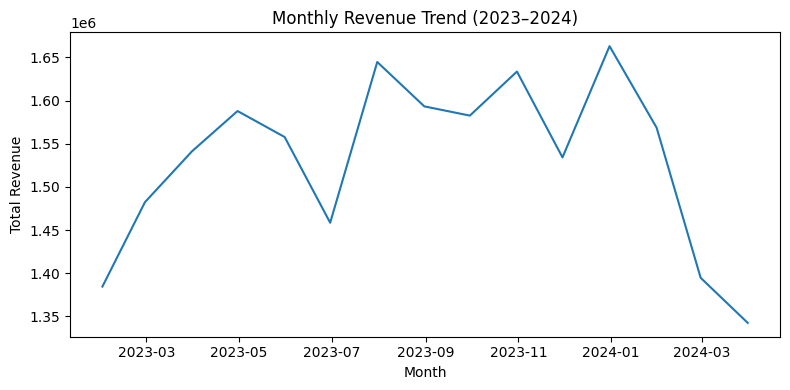

In [14]:
# Monthly revenue trend
monthly_revenue = (
    df.set_index('Date')
      .resample('M')['Revenue']
      .sum()
)

plt.figure(figsize=(8, 4))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Trend (2023–2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


### Initial Revenue Trend Insight

The monthly revenue trend demonstrates clear variation across the 2023–2024 period, indicating the presence of seasonality and demand fluctuations.

This insight highlights opportunities for intelligent automation, such as:
• Timing customer acquisition campaigns during high-conversion periods
• Automating promotional strategies during low-revenue months
• Supporting data-driven forecasting for inventory and marketing decisions


In [15]:
# Revenue contribution: Returning vs New customers
retention_revenue = (
    df.groupby('Is_Returning_Customer')['Revenue']
      .sum()
      .reset_index()
)

retention_revenue


,Is_Returning_Customer,Revenue
0,False,2729607.73
1,True,20239262.78


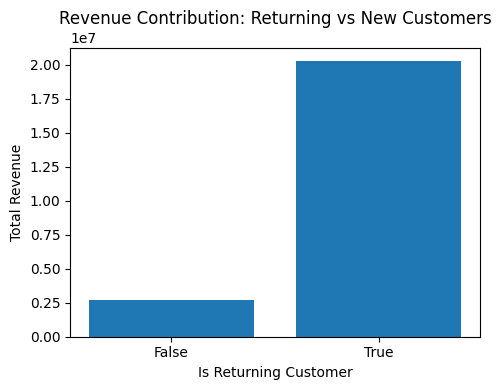

In [16]:
plt.figure(figsize=(5,4))
plt.bar(
    retention_revenue['Is_Returning_Customer'].astype(str),
    retention_revenue['Revenue']
)
plt.title('Revenue Contribution: Returning vs New Customers')
plt.xlabel('Is Returning Customer')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


### Retention Insight – Returning Customer Impact

The analysis shows that returning customers contribute a disproportionately high share of total revenue compared to new customers.

This finding highlights customer retention as a critical growth lever and supports the case for intelligent automation, such as:
• Automated re-engagement campaigns for high-value returning customers
• Personalised recommendations driven by past purchase behaviour
• Retention-focused decision-making supported by analytics


### Milestone 2 – Customer Retention and Revenue Impact (Completed)

The analysis demonstrates that returning customers generate a significantly higher share of total revenue compared to new customers.

This insight highlights retention as a primary driver of sustainable growth and illustrates how data-driven analytics can directly inform intelligent automation strategies. Examples include automated re-engagement workflows, personalised product recommendations, and prioritisation of high-value customer segments.

These findings align with real-world digital commerce challenges and demonstrate applied expertise in translating customer data into actionable, automation-focused business decisions.


In [17]:
# Reference date for recency calculation
analysis_date = df['Date'].max() + pd.Timedelta(days=1)

# RFM-style aggregation
rfm = (
    df.groupby('Customer_ID')
      .agg({
          'Date': lambda x: (analysis_date - x.max()).days,  # Recency
          'Order_ID': 'nunique',                               # Frequency
          'Revenue': 'sum'                                    # Monetary
      })
      .reset_index()
)

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,Customer_ID,Recency,Frequency,Monetary
0,CUST_00001,112,3,2337.68
1,CUST_00002,284,2,880.95
2,CUST_00003,83,2,3030.81
3,CUST_00004,42,1,481.00
4,CUST_00005,279,3,2422.73


In [18]:
# Create simple segmentation using quantiles
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 3, labels=['Low', 'Medium', 'High'])
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 3, labels=['Low', 'Medium', 'High'])
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 3, labels=['Low', 'Medium', 'High'])

rfm.head()


,Customer_ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,CUST_00001,112,3,2337.68,Medium,Medium,Medium
1,CUST_00002,284,2,880.95,High,Low,Low
2,CUST_00003,83,2,3030.81,Medium,Low,Medium
3,CUST_00004,42,1,481.00,Low,Low,Low
4,CUST_00005,279,3,2422.73,High,Medium,Medium


In [19]:
def segment_customer(row):
    if row['Recency_Score'] == 'Low' and row['Frequency_Score'] == 'High' and row['Monetary_Score'] == 'High':
        return 'High-Value Loyal Customers'
    elif row['Recency_Score'] == 'High' and row['Frequency_Score'] == 'Low':
        return 'At-Risk Customers'
    else:
        return 'Standard Customers'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

rfm['Customer_Segment'].value_counts()


,count
Customer_Segment,
Standard Customers,3340
At-Risk Customers,1143
High-Value Loyal Customers,517


### Milestone 3 – Customer Segmentation for Intelligent Automation (Completed)

Customer-level behavioural segmentation was performed using recency, frequency, and monetary value metrics.

The analysis identified distinct segments including high-value loyal customers and at-risk customers. This segmentation enables targeted intelligent automation strategies such as personalised recommendations for loyal customers and automated re-engagement workflows for at-risk customers.

This milestone demonstrates the application of advanced analytics techniques to support scalable, automation-driven decision-making in modern digital commerce environments.
